<a href="https://colab.research.google.com/github/AbhayMudgal/BTP/blob/main/BTP_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,10)


In [ ]:
def B(delE):

  # The metropolis funtion. The multiplier 200 is taken by using the constants
  # in ΔE/kT. It will vary is specific systems are used or other values are taken.  
  
  deE = - delE * 200
  if deE < -5:
    deE = 0
  if deE > 1:
    deE = 1
  U = math.exp(deE)
  return min(U, 1)

def E( X, Y, W, H, sign):

  # The Energy funtion for the interaction between solute and dislocation. We do
  # not use the values of other variables as they are collectively assumed to a 
  # value in the metropolis function. 
  
  pi = np.pi
  ans = 0
  for i in range(-4, 5):
    ans += ( np.sin(2*pi*Y) / ( np.cosh(2*pi*(X - (i*W/H))) - np.cos(2* pi *Y)))
  
  return ans*sign
 


In [ ]:
#entering parameters and calculating the number of solute atoms.

conc1 = float (input("Enter percentage concentration of solute1: "))
conc2 = float (input("Enter percentage concentration of solute2: "))

sign1 = float (input("Enter Relative Volume of Solute1: "))
sign2 = float (input("Enter Relative Volume of Solute2: "))

#Mr1 = float (input("Enter mobility ratio of solute1: "))
#Mr2 = float (input("Enter mobility ratio of solute2: "))


Enter percentage concentration of solute1: 0.25
Enter percentage concentration of solute2: 0.25
Enter Relative Volume of Solute1: 1
Enter Relative Volume of Solute2: -1


In [ ]:
W = int (input("Enter Width of the simulation cell: "))
H = int (input("Enter Height of the simulation cell: "))

Enter Width of the simulation cell: 100
Enter Height of the simulation cell: 100


In [ ]:
#initializing array  and randomly distributing solutes in the matrix

array = np.zeros((W, H), int)

sol_loc = [] # represents an array with the locations of the solute atoms. 
loc_set = set() # a set containing the locations of the solute atoms and the dislocation. 

sol1 = (H*W*conc1)/100
sol2 = (H*W*conc2)/100
a = 0

x_dis = int (W/2)
y_dis = int (H/2)


array[x_dis][y_dis] = -1
loc_set.add((x_dis, y_dis, 0))

while (a < sol1): # distributing first variety of solute.

  x = random.randint(0, W-1)
  y = random.randint(0, H-1)
      
  if array[x][y] == 0:
    array[x][y] = 1
    sol_loc.append([x, y, 1])
    loc_set.add((x, y, 1))
    a = a+1    
      
    if (a==sol1): 
      break 

while (a < sol1 + sol2): # distributing second variety of solute.
  x = random.randint(0, W-1)
  y = random.randint(0, H-1)
      
  if array[x][y] == 0:
    array[x][y] = 2
    sol_loc.append([x, y, 2])
    loc_set.add((x, y, 2))
    a = a+1    
      
    if (a==sol1): 
      break 

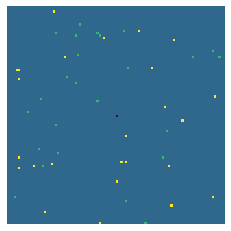

In [ ]:
#projecting the array as image

plt.rcParams["figure.figsize"] = (5,5) # represents the dimensions of the image.
# can be varied to suit the dimensions of the simulation cell. 

plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()

In [ ]:
#randomly selecting a solute atom.
sol = sol1 + sol2

iter = int (input("Enter Number of Iterations: "))
for i in range(iter):
   
   # The if statement is the code for downloading the of the simulation cell. 
   # Create a folder image on the device and copy the path and replace it with 
   # "Image" in the below code. This is the most time consuming step. As such for
   # only observation we can reduce the frequency of image collection.

    if i%100 == 0:
      name = r"Image/" + str (int( i/100)) + ".png"
      plt.rcParams["figure.figsize"] = (5,5)
      plt.grid(False)
      plt.axis('off')
      image = plt.imshow(array, interpolation='nearest')
      plt.savefig(name)
    
    
    n = random.randint(0, sol-1) # selecting a random solute.
    
    x = sol_loc[n][0]
    y = sol_loc[n][1]
    ty = sol_loc[n][2]
    
    for i in range(4):
      xi = x
      yi = y
    
      if (i==0):
        xi = (x - 1) % W
      elif (i==1):
        yi = (y - 1) % H
      elif (i==2):
        xi = (x + 1) % W
      else:
        yi = (y + 1) % H
      
      if ((xi, yi, ty) not in loc_set) and (xi, yi, 3-ty) not in loc_set: # feasibility of jump
        
        X = (x - x_dis) / W
        Y = (y - y_dis) / H
        Xi = (xi - x_dis) / W
        Yi = (yi - y_dis) / H
        
        if ty == 1:
          si = sign1
        else: 
          si = sign2  

        delE = E(Xi, Yi, W, H, si) - E(X, Y, W, H, si)
        n = random.random()
        b = B(delE)

        if n < b:
          m = random.random()
          if delE*200 < 0 or m>0.8:
            array[x][y] = 0
            array[xi][yi] = ty

            loc_set.remove((x, y, ty))
            loc_set.add((xi, yi, ty))
            sol_loc.append([xi, yi, ty])
            sol_loc.remove([x, y, ty])
              
            break
        

In [ ]:
# if used in colab this code can be used to create a downloadable zip file. 
!zip -r /content/Image.zip /content/Image

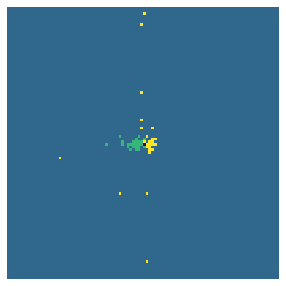

In [ ]:
#Plotting the image
plt.rcParams["figure.figsize"] = (5,5)
plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()